# 5.1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


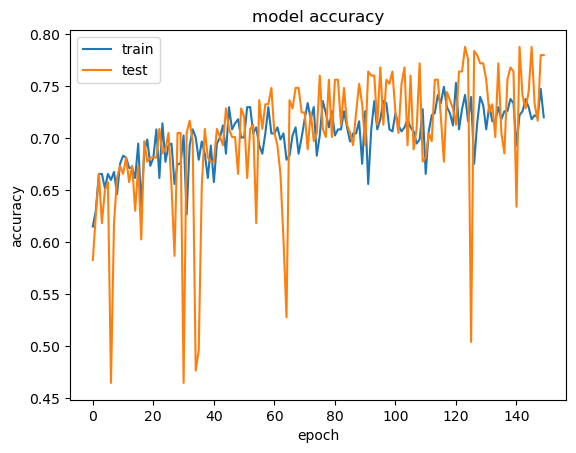

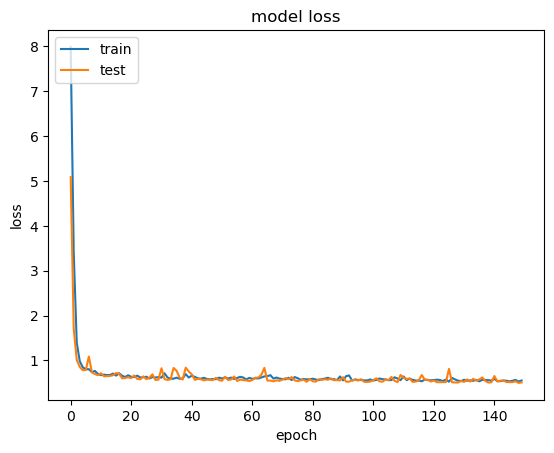

In [1]:
# Import các thư viện cần thiết
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Load dữ liệu từ tập tin "pima-indians-diabetes.csv" và chia thành input (X) và output (Y)
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:, 0:8]  # Sử dụng cột từ 0 đến 7 làm đặc trưng đầu vào
Y = dataset[:, 8]     # Sử dụng cột 8 làm đầu ra (output)

# Tạo mô hình Sequential, một kiến trúc mạng thần kinh tuần tự
model = Sequential()
#
model.add(Dense(12, input_dim=8, activation='relu'))  # Lớp ẩn với 12 đơn vị và hàm kích hoạt ReLU
model.add(Dense(8, activation='relu'))              # Lớp ẩn với 8 đơn vị và hàm kích hoạt ReLU để giúp mô hình phi tuyến tính
model.add(Dense(1, activation='sigmoid'))           # Lớp đầu ra với hàm kích hoạt Sigmoid để đổi đầu ra các giá trị trong khoảng từ 0 tới 1, phù hợp cho bài toán nhị phân

# Compile mô hình: Chọn hàm mất mát, optimizer và các metric để theo dõi
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Đào tạo mô hình với dữ liệu huấn luyện
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# In ra tất cả các keys trong history (lịch sử đào tạo)
print(history.history.keys())

# Vẽ biểu đồ cho độ chính xác (accuracy) trên tập huấn luyện và tập kiểm tra
plt.plot(history.history['accuracy'])           # Độ chính xác trên tập huấn luyện
plt.plot(history.history['val_accuracy'])       # Độ chính xác trên tập kiểm tra (validation set)
plt.title('model accuracy')                     # Đặt tiêu đề biểu đồ
plt.ylabel('accuracy')                          # Đặt nhãn trục y
plt.xlabel('epoch')                             # Đặt nhãn trục x
plt.legend(['train', 'test'], loc='upper left') # Hiển thị chú thích (legend)
plt.show()                                      # Hiển thị biểu đồ

# Vẽ biểu đồ cho hàm mất mát (loss) trên tập huấn luyện và tập kiểm tra
plt.plot(history.history['loss'])               # Hàm mất mát trên tập huấn luyện
plt.plot(history.history['val_loss'])           # Hàm mất mát trên tập kiểm tra (validation set)
plt.title('model loss')                         # Đặt tiêu đề biểu đồ
plt.ylabel('loss')                              # Đặt nhãn trục y
plt.xlabel('epoch')                             # Đặt nhãn trục x
plt.legend(['train', 'test'], loc='upper left') # Hiển thị chú thích (legend)
plt.show()                                      # Hiển thị biểu đồ


# 5.2

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6630 - acc: 0.6377 - val_loss: 0.6084 - val_acc: 0.7048
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5335 - acc: 0.7516 - val_loss: 0.5225 - val_acc: 0.7362
Epoch 3/10
625/6

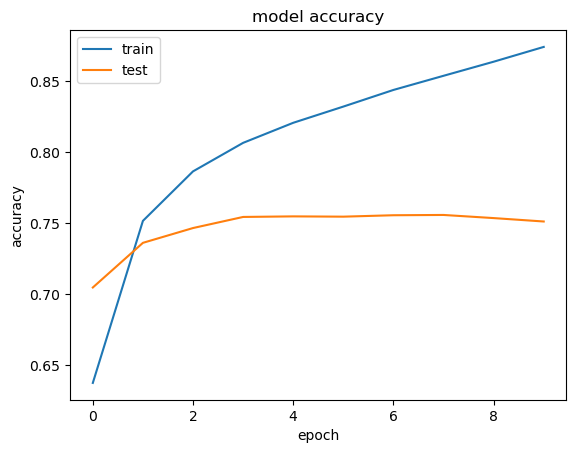

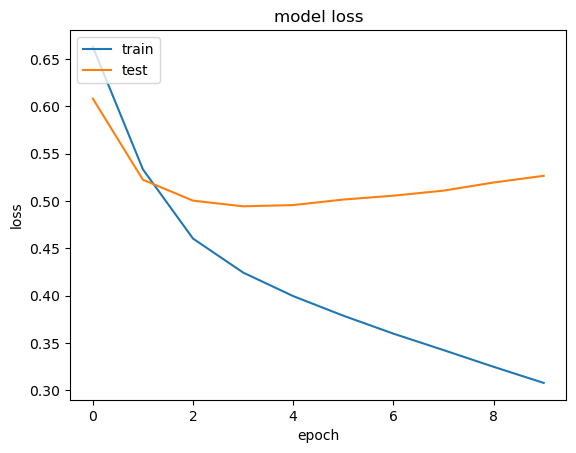

In [8]:
from keras.datasets import imdb
from keras import preprocessing
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Định nghĩa số lượng từ vựng tối đa và độ dài tối đa của mỗi đánh giá phim
max_features = 10000
maxlen = 20

# Tải dữ liệu IMDB và chia thành tập huấn luyện và tập kiểm tra
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Chuẩn bị dữ liệu bằng cách đảm bảo rằng mỗi đánh giá phim có cùng độ dài
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Xây dựng mô hình Sequential
model = Sequential()

# Thêm lớp Embedding để biểu diễn từ
model.add(Embedding(10000, 8, input_length=maxlen))

# Thêm lớp Flatten để chuyển đổi dữ liệu thành vector 1D
model.add(Flatten())

# Thêm lớp Dense với hàm kích hoạt sigmoid cho phân loại nhị phân
model.add(Dense(1, activation='sigmoid'))

# Biên soạn mô hình với optimizer, hàm mất mát và metric
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# In thông tin về kiến trúc của mô hình
model.summary()

# Đào tạo mô hình trên dữ liệu huấn luyện
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Vẽ biểu đồ độ chính xác trên tập huấn luyện và tập kiểm tra qua từng epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Vẽ biểu đồ hàm mất mát trên tập huấn luyện và tập kiểm tra qua từng epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
